In [1]:
!pwd

/Users/ashish1610dhiman/data_projects/bestbuy_backup/notebooks/ashish


In [2]:
import sys
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

sys.version

'3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:55:37) \n[Clang 14.0.6 ]'

In [3]:
%load_ext autoreload 
%autoreload 2

In [12]:
import statsmodels.api as sm

### Test on one sku

In [62]:
train_test = pd.read_csv("../../data/train_validation_marker.csv")
train_test["SALES_DATE"] = pd.to_datetime(train_test["SALES_DATE"])
train_test.shape

(846632, 15)

In [5]:
#clean train/test
train = train_test[(train_test.validation==False) & (train_test.validation_clean==True)]
validation = train_test[(train_test.validation==True) & (train_test.validation_clean==True)]
train.shape,validation.shape

((797490, 15), (3815, 15))

<AxesSubplot: xlabel='SALES_DATE'>

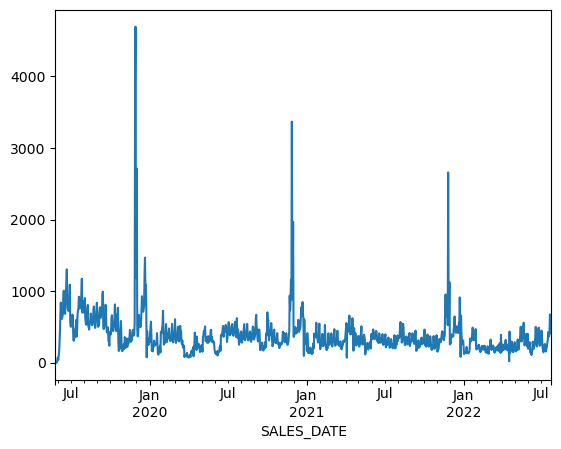

In [48]:
sku_id = 469
train_sku = train[train.Encoded_SKU_ID == sku_id]
validation_sku = validation[validation.Encoded_SKU_ID == sku_id]

train_sales_sku = train_sku["DAILY_UNITS"]
train_sales_sku.index = train_sku["SALES_DATE"]
train_sales_sku = train_sales_sku.sort_index()
train_sales_sku.plot()

In [58]:
# Fit the model
# (a switching mean is the default of the MarkovRegession model)
model0 = sm.tsa.MarkovRegression(train_sales_sku, k_regimes=2, order = 2)
res_model0 = model0.fit()
res_model0.aic,res_model0.bic

/Users/ashish1610dhiman/opt/anaconda3/envs/bestbuy/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


(15965.024553221276, 15990.288158467438)

In [59]:
validation["SALES_DATE"].min()

Timestamp('2022-07-25 00:00:00')

In [61]:
res_model0.predict(start=len(train_sales_sku),end=len(train_sales_sku)+1)

NotImplementedError: 

In [7]:
# Fit the model
mod_fedfunds2 = sm.tsa.MarkovRegression(
    dta_fedfunds.iloc[1:], k_regimes=2, exog=dta_fedfunds.iloc[:-1]
)
res_fedfunds2 = mod_fedfunds2.fit()

NameError: name 'sm' is not defined